In [1]:
from model_On_Array2 import *
import pandas as pd
import os
import sys
import itertools
import random
from pathlib import Path
import numpy as np
import dataprocessing2
import glob
import os.path
from datetime import datetime, timedelta
import process_utils
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from scipy.optimize import leastsq
from scipy.optimize import least_squares
from sklearn.model_selection import train_test_split
import pickle 
import matplotlib.pyplot as plt

In [2]:
model=mainmodel(maison='singleroom')
model.update_theta()
model.set_theta(model.theta)

In [3]:
model.setupdata()

In [5]:
for key,data in model.traindic.
model.simulate(model.traindic)

AttributeError: 'list' object has no attribute 'shape'

In [23]:
a,b=train_test_split(np.unique(model.raw.index.get_level_values(0)),test_size=0.99,random_state=42)

In [25]:
a

array(['2021-02-18', '2021-05-07', '2020-09-03'], dtype=object)

In [7]:
D=model.make_trajectory_dict(model.raw,model.traindays)

In [4]:
model.traindays

NameError: name 'model' is not defined

In [1]:
model.traindays

NameError: name 'model' is not defined

In [8]:
model.make_trajectory_dict(model.raw,model.traindays)

In [4]:
model.simulate(model.trainarray)

In [5]:
x=minimize(model.metric1,model.theta,args=(model.trainarray),options={'maxiter':20,'disp':True})

Optimization terminated successfully.
         Current function value: 0.003580
         Iterations: 8
         Function evaluations: 77
         Gradient evaluations: 11


In [6]:
model.theta=x.x
model.update_theta()

In [7]:
model.simulate(model.trainarray)

In [8]:
test=model.make_day_trajectory_dict(model.raw)

In [9]:
model.simulate(test)

In [22]:
test['simulated'].shape

(286, 1)

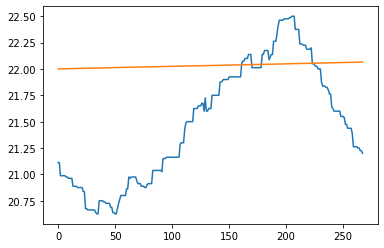

In [14]:
plt.plot(test['state'])
plt.plot(test['simulated'])
plt.savefig('fail.png')

In [15]:
dicsim=model.make_trajectory_dict(model.raw)

[array([[21.1625],
        [21.1625],
        [21.1125],
        [21.1125],
        [21.1125],
        [21.1125],
        [21.1125],
        [21.1   ],
        [21.1   ],
        [21.075 ],
        [21.075 ],
        [21.075 ],
        [21.075 ],
        [21.0125],
        [21.    ],
        [21.0375],
        [21.0375],
        [21.0375],
        [21.0375],
        [21.0375],
        [21.0125],
        [21.0125],
        [21.0125],
        [21.0125],
        [21.0125],
        [21.0125],
        [21.025 ],
        [21.    ],
        [21.    ],
        [20.9875],
        [20.8625],
        [20.8625],
        [20.8625],
        [20.8625],
        [20.8625],
        [20.8625],
        [20.8625],
        [20.8625],
        [20.8625],
        [20.825 ],
        [20.825 ],
        [20.675 ],
        [20.6375],
        [20.6375],
        [20.6375],
        [20.6375],
        [20.6375],
        [20.6375],
        [20.6375],
        [20.7125],
        [20.7125],
        [20.6875]]),
 array([[2

In [25]:
model.raw.index.get_level_values(0)

Index(['2020-05-24', '2020-05-24', '2020-05-24', '2020-05-24', '2020-05-24',
       '2020-05-24', '2020-05-24', '2020-05-24', '2020-05-24', '2020-05-24',
       ...
       '2021-05-24', '2021-05-24', '2021-05-24', '2021-05-24', '2021-05-24',
       '2021-05-24', '2021-05-24', '2021-05-24', '2021-05-24', '2021-05-24'],
      dtype='object', name='uniqueday_Id', length=102192)